In [2]:
'''SEBASTIAN ALZATE SIERRA'''
import control as co
import matplotlib.pyplot as plt
from AG_GENERAL import *

# CONTROLADOR P

### LAZO ABIERTO

In [3]:
num = 0.006679
den = [1, 0.2547, 0.008125]
G = co.tf(num, den)
G

TransferFunction(array([0.006679]), array([1.      , 0.2547  , 0.008125]))

In [4]:
data_la = co.step_info(G)
print(f'Informacion de Funcion de transferencia lazo abierto: \n {data_la}')

Informacion de Funcion de transferencia lazo abierto: 
 {'RiseTime': 59.68024589558046, 'SettlingTime': 109.83704829718532, 'SettlingMin': 0.7399180978670309, 'SettlingMax': 0.8220307692307691, 'Overshoot': 0, 'Undershoot': 0, 'Peak': 0.8210379164197981, 'PeakTime': 184.75480378312676, 'SteadyStateValue': 0.8220307692307691}


In [5]:
parametros = list(data_la.values())
mp = float(parametros[4])
mp

0.0

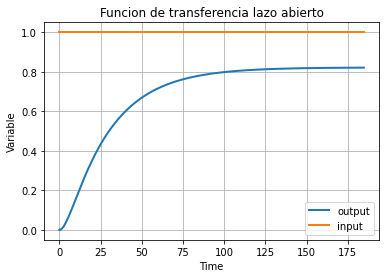

In [6]:
response = co.step_response(G)
plt.plot(response.time, response.outputs, response.time, response.inputs, linewidth = 2)
plt.title('Funcion de transferencia lazo abierto')
plt.legend(['output', 'input'])
plt.xlabel('Time')
plt.ylabel('Variable')
plt.grid()
plt.show()

### LAZO CERRADO

In [7]:
G_realimentado = co.feedback(G)
data2 = co.step_info(G_realimentado)
print(f'Informacion de Funcion de transferencia realimentada sin controlador: \n {data2}')

Informacion de Funcion de transferencia realimentada sin controlador: 
 {'RiseTime': 29.5438968922379, 'SettlingTime': 52.86802601768888, 'SettlingMin': 0.40713858522268975, 'SettlingMax': 0.4511618481491489, 'Overshoot': 0, 'Undershoot': 0, 'Peak': 0.45017395134200144, 'PeakTime': 76.96962611398821, 'SteadyStateValue': 0.4511618481491489}


In [8]:
G_realimentado

TransferFunction(array([0.006679]), array([1.      , 0.2547  , 0.014804]))

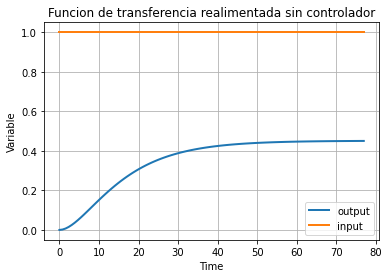

In [9]:
response_G = co.step_response(G_realimentado)
plt.plot(response_G.time, response_G.outputs, response_G.time, response_G.inputs, linewidth = 2)
plt.title('Funcion de transferencia realimentada sin controlador')
plt.xlabel('Time')
plt.ylabel('Variable')
plt.legend(['output', 'input'])
plt.grid()
plt.show()    

## AG

In [10]:
def funcion_objetivo(kp):
    num = 0.006679
    den = [1, 0.2547, 0.008125]
    G = co.tf(num, den)
    numc = [kp]
    denc = [1]
    Gc = co.tf(numc, denc)
    Gt = co.series(Gc, G)
    Gtc = co.feedback(Gt)
    data = co.step_info(Gtc)
    response = co.step_response(Gtc)
    data = co.step_info(Gtc)
    parametros = list(data.values())
    mp = float(parametros[4])
    #e_ss = abs(1- response.outputs[-1])+abs(mp-0.2) #ERROR EN ESTADO ESTABLE 0 Y MP REDUCCION 0.2
    e_ss = abs(0.8- response.outputs[-1])
    return (e_ss)


In [11]:
poblacion = Poblacion(
                  n_individuos = 100,
                  n_variables  = 1,
                  limites_inf  = [0.001],
                  limites_sup  = [1000],
                  verbose      = False
                  )

In [12]:
variables_optimas = poblacion.optimizar(
          funcion_objetivo   = funcion_objetivo,
          optimizacion       = "minimizar",
          n_generaciones     = 30,
          metodo_seleccion   = "tournament",
          elitismo           = 0.08,
          prob_mut           = 0.1,
          distribucion       = "uniforme",
          media_distribucion = 1,
          sd_distribucion    = 1,
          min_distribucion   = -1,
          max_distribucion   = 1,
          parada_temprana    = False,
          rondas_parada      = 100,
          tolerancia_parada  = 10**-16,
          verbose            = False
            )


-------------------------------------------
Optimización finalizada 2023-06-09 08:23:27
-------------------------------------------
Duración optimización: 85.68154501914978
Número de generaciones: 29
Valor óptimo de las variables: [4.877666721530068]
Valor función objetivo: 0.0003319200086140395



In [13]:
kp=4.877666721530068
error = funcion_objetivo(kp)
print(error)

0.0003319200086140395


In [14]:
numc = [kp]
denc = [1]
Gc = co.tf(numc, denc) #FdT CONTROLADOR
Gc

TransferFunction(array([4.87766672]), array([1]))

In [15]:
Gt=co.series(Gc,G)
Gt

TransferFunction(array([0.03257794]), array([1.      , 0.2547  , 0.008125]))

In [16]:
Gtc = co.feedback(Gt)
Gtc

TransferFunction(array([0.03257794]), array([1.        , 0.2547    , 0.04070294]))

In [17]:
data_controlador = co.step_info(Gtc)
data3 = co.step_info(Gtc) #Informacion Controlador realimentado
print(f'Informacion de Funcion de transferencia realimentada con controlador: \n {data3}')

Informacion de Funcion de transferencia realimentada con controlador: 
 {'RiseTime': 9.314332150931882, 'SettlingTime': 30.134604017720797, 'SettlingMin': 0.7204443476803434, 'SettlingMax': 0.8624062624339622, 'Overshoot': 7.7492045497590025, 'Undershoot': 0, 'Peak': 0.8624062624339622, 'PeakTime': 20.272369975557627, 'SteadyStateValue': 0.8003829504241952}


In [18]:
data = co.step_info(Gtc)
parametros = list(data.values())
mp = float(parametros[4])
mp

7.7492045497590025

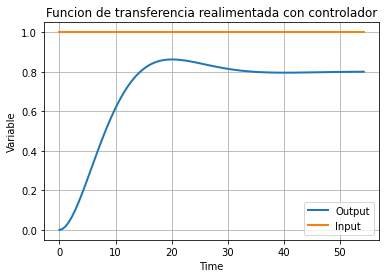

In [19]:
response_controlador = co.step_response(Gtc)
plt.plot(response_controlador.time, response_controlador.outputs, 
    response_controlador.time, response_controlador.inputs, linewidth = 2)
plt.title('Funcion de transferencia realimentada con controlador')
plt.xlabel('Time')
plt.ylabel('Variable')
plt.legend(['Output', 'Input'])
plt.grid()


# CONTROLADOR PI

### LAZO ABIERTO

In [30]:
num = 0.90888
den = [52.32874, 1]
G = co.tf(num, den)
G

TransferFunction(array([0.90888]), array([52.32874,  1.     ]))

In [31]:
data = co.step_info(G)
print(f'Informacion de Funcion de transferencia lazo abierto: \n {data}')

Informacion de Funcion de transferencia lazo abierto: 
 {'RiseTime': 113.18886898284843, 'SettlingTime': 208.12146877491486, 'SettlingMin': 0.8179920000000004, 'SettlingMax': 0.90888, 'Overshoot': 0, 'Undershoot': 0, 'Peak': 0.9079711200000006, 'PeakTime': 361.4741299774837, 'SteadyStateValue': 0.90888}


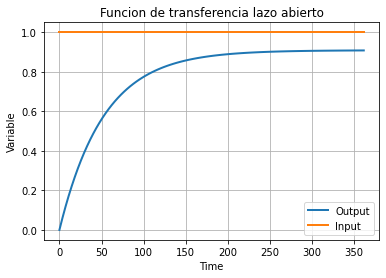

In [32]:
response = co.step_response(G)
plt.plot(response.time, response.outputs, response.time, response.inputs, linewidth = 2)
plt.title('Funcion de transferencia lazo abierto')
plt.legend(['Output', 'Input'])
plt.xlabel('Time')
plt.ylabel('Variable')
plt.grid()
plt.show()

### Lazo cerrado

In [83]:
G_realimentado = co.feedback(G)
data2 = co.step_info(G_realimentado)
print(f'Informacion de Funcion de transferencia realimentada sin controlador: \n {data2}')

Informacion de Funcion de transferencia realimentada sin controlador: 
 {'RiseTime': 61.208731204164145, 'SettlingTime': 109.02805245741739, 'SettlingMin': 0.4317283155612075, 'SettlingMax': 0.4761326013159549, 'Overshoot': 0, 'Undershoot': 0, 'Peak': 0.4756564687146388, 'PeakTime': 189.36451216288282, 'SteadyStateValue': 0.4761326013159549}


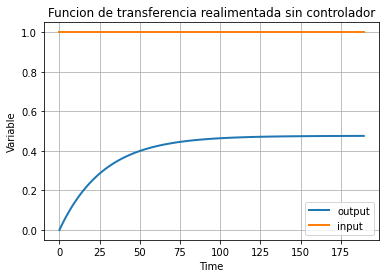

In [84]:
response_G = co.step_response(G_realimentado)
plt.plot(response_G.time, response_G.outputs, response_G.time, response_G.inputs, linewidth = 2)
plt.title('Funcion de transferencia realimentada sin controlador')
plt.xlabel('Time')
plt.ylabel('Variable')
plt.legend(['output', 'input'])
plt.grid()
plt.show()    

### Función de trasnferencia Controlador PI

### <div align="center">$k_{c}$ * $\frac{T_{i}s +1}{T_{i} s}$</div>

### <div align="center"> $\frac{k_{c} T_{i}s+ k_{c}}{T_{i} s}$</div>

### AG

In [41]:
def funcion_objetivo(K,Ti):
    num = 0.90888
    den = [52.32874, 1]
    numc = [K*Ti, Ti]
    denc = [Ti, 0]
    G = co.tf(num, den) #FdT
    Gc = co.tf(numc, denc) #CONTROLADOR
    Gt = co.series(G, Gc) #FdT SERIE CON CONTROLADOR
    Gtc = co.feedback(Gt) #REALIMENTAR SISTEMA
    response = co.step_response(Gtc) #RESPUESTA ESCALON SISTEMA
    data = co.step_info(Gtc)
    parametros = list(data.values())
    mp = float(parametros[4])
    tss = float(parametros[1])
    #e= sum(abs(response.inputs - response.outputs))
    e = abs(tss-50)
    return e

In [42]:
poblacion = Poblacion(
                  n_individuos = 100,
                  n_variables  = 2,
                  limites_inf  = [0, 0.0001],
                  limites_sup  = [1000, 5],
                  verbose      = False
                  )

In [43]:
variables_optimas = poblacion.optimizar(
          funcion_objetivo   = funcion_objetivo,
          optimizacion       = "minimizar",
          n_generaciones     = 100,
          metodo_seleccion   = "tournament",
          elitismo           = 0.08, #porcentaje de mejores ind. que pasan
          prob_mut           = 0.1, #probabildad de mutación cada ind.
          distribucion       = "uniforme", #distribucion factor mutacion, puede ser normal, aleatoria, unif
          media_distribucion = 1,
          sd_distribucion    = 1, #desviacion estandar
          min_distribucion   = -1, 
          max_distribucion   = 1,
          parada_temprana    = False,
          rondas_parada      = 20,
          tolerancia_parada  = 10**-16,
          verbose            = False
            )

-------------------------------------------
Optimización finalizada 2023-06-09 08:45:01
-------------------------------------------
Duración optimización: 216.10513830184937
Número de generaciones: 99
Valor óptimo de las variables: [7.962468846965056 2.123701159863306]
Valor función objetivo: 0.3528019385469321



In [44]:
kp=7.962468846965056
ti=2.123701159863306
error = funcion_objetivo(kp, ti)
print(error)

0.3528019385469321


In [45]:
print('Las parametros optimos para el controlador son')
print(f'Ganancia proporcional: {kp}')
print(f'tiempo integral: {ti}')

Las parametros optimos para el controlador son
Ganancia proporcional: 7.962468846965056
tiempo integral: 2.123701159863306


In [46]:
numc = [kp*ti, ti]
denc = [ti, 0]
Gc = co.tf(numc, denc) #FdT CONTROLADOR
Gc

TransferFunction(array([16.90990433,  2.12370116]), array([2.12370116, 0.        ]))

In [47]:
Gt = co.series(G, Gc) #Controlador en serie con la FdT
Gt

TransferFunction(array([15.36907384,  1.93018951]), array([111.13060583,   2.12370116,   0.        ]))

In [48]:
Gtc = co.feedback(Gt) #Controlador realimentado
data3 = co.step_info(Gtc) #Informacion Controlador realimentado
print(f'Informacion de Funcion de transferencia realimentada con controlador: \n {data3}')

Informacion de Funcion de transferencia realimentada con controlador: 
 {'RiseTime': 7.9790139741621, 'SettlingTime': 49.64719806145307, 'SettlingMin': 0.9314413898789659, 'SettlingMax': 1.2094697555940042, 'Overshoot': 20.946975559400414, 'Undershoot': 0, 'Peak': 1.2094697555940042, 'PeakTime': 18.617699273044902, 'SteadyStateValue': 1.0}


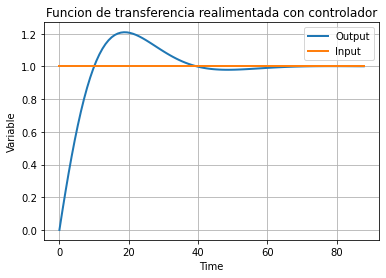

In [49]:
response_controlador = co.step_response(Gtc) #Step Controlador

plt.plot(response_controlador.time, response_controlador.outputs, 
    response_controlador.time, response_controlador.inputs, linewidth = 2)
plt.title('Funcion de transferencia realimentada con controlador')
plt.xlabel('Time')
plt.ylabel('Variable')
plt.legend(['Output', 'Input'])
plt.grid()


In [40]:
e = sum(abs(response_controlador.inputs - response_controlador.outputs))
e

14.912002166922045

***

# CONTROLADOR PID

### Lazo Abierto

In [210]:
num = 0.006679
den = [1, 0.2547, 0.008125]
G = co.tf(num, den)
G

TransferFunction(array([0.006679]), array([1.      , 0.2547  , 0.008125]))

In [211]:
data_la = co.step_info(G)
print(f'Informacion de Funcion de transferencia lazo abierto: \n {data_la}')
parametros=list(data_la)

Informacion de Funcion de transferencia lazo abierto: 
 {'RiseTime': 59.68024589558046, 'SettlingTime': 109.83704829718532, 'SettlingMin': 0.7399180978670309, 'SettlingMax': 0.8220307692307691, 'Overshoot': 0, 'Undershoot': 0, 'Peak': 0.8210379164197981, 'PeakTime': 184.75480378312676, 'SteadyStateValue': 0.8220307692307691}


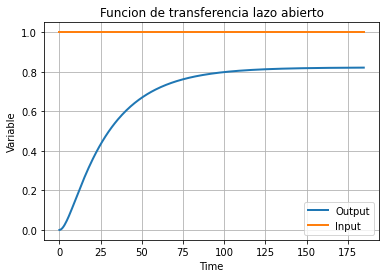

In [212]:
response = co.step_response(G)
plt.plot(response.time, response.outputs, response.time, response.inputs, linewidth = 2)
plt.title('Funcion de transferencia lazo abierto')
plt.legend(['Output', 'Input'])
plt.xlabel('Time')
plt.ylabel('Variable')
plt.grid()
plt.show()

### Lazo cerrado

In [213]:
G_realimentado = co.feedback(G)
data2 = co.step_info(G_realimentado)
print(f'Informacion de Funcion de transferencia realimentada sin controlador: \n {data2}')

Informacion de Funcion de transferencia realimentada sin controlador: 
 {'RiseTime': 29.5438968922379, 'SettlingTime': 52.86802601768888, 'SettlingMin': 0.40713858522268975, 'SettlingMax': 0.4511618481491489, 'Overshoot': 0, 'Undershoot': 0, 'Peak': 0.45017395134200144, 'PeakTime': 76.96962611398821, 'SteadyStateValue': 0.4511618481491489}


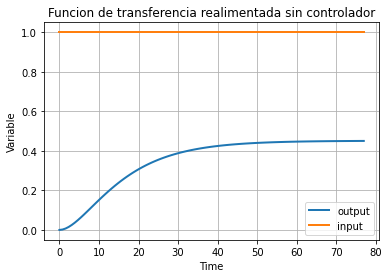

In [214]:
response_G = co.step_response(G_realimentado)
plt.plot(response_G.time, response_G.outputs, response_G.time, response_G.inputs, linewidth = 2)
plt.title('Funcion de transferencia realimentada sin controlador')
plt.xlabel('Time')
plt.ylabel('Variable')
plt.legend(['output', 'input'])
plt.grid()
plt.show()    

### Función de trasnferencia Controlador PID  

### <div align="center">$k_{p}$ + $k_{d}$s + $\frac{k_{i}}{s}$</div>

## <div align="center">$\frac{k_{d}s^2 + k_{p}s + k_{i} }{s}$</div>

### AG

In [218]:
def funcion_objetivo(kp, ki, kd):
    num = 0.006679
    den = [1, 0.2547, 0.008125]
    G = co.tf(num, den)
    numc = [kd,  kp, ki]
    denc = [1, 0]
    Gc = co.tf(numc, denc)
    Gt = co.series(Gc, G)
    Gtc = co.feedback(Gt)
    data = co.step_info(Gtc)
    parametros = list(data.values())
    tss = float(parametros[1])
    mp = float(parametros[4])
    response = co.step_response(Gtc)
    #e_abs = sum(abs(response.inputs - response.outputs))
    e_ss = abs(1 - response.outputs[-1]) #Error estado estable
    e = abs(90 - tss) + abs(1.1 - mp) + e_ss #MP 10% TSS REDUC 10%
    return e

In [219]:
poblacion = Poblacion(
                  n_individuos = 100,
                  n_variables  = 3,
                  limites_inf  = [0.001, 0.01, 0.001],
                  limites_sup  = [10, 0.8, 0.8],
                  verbose      = False
                  )

In [220]:
variables_optimas = poblacion.optimizar(
          funcion_objetivo   = funcion_objetivo,
          optimizacion       = "minimizar",
          n_generaciones     = 50,
          metodo_seleccion   = "tournament",
          elitismo           = 0.08,
          prob_mut           = 0.1,
          distribucion       = "uniforme",
          media_distribucion = 1,
          sd_distribucion    = 1,
          min_distribucion   = -1,
          max_distribucion   = 1,
          parada_temprana    = True,
          rondas_parada      = 25,
          tolerancia_parada  = 10**-16,
          verbose            = False
            )


-------------------------------------------
Optimización finalizada 2023-05-25 12:43:24
-------------------------------------------
Duración optimización: 87.79136633872986
Número de generaciones: 49
Valor óptimo de las variables: [6.597704875321765 0.12293207394551312 0.7395555828970253]
Valor función objetivo: 3.3477454335038876



In [221]:
kp = 6.597704875321765
ti= 0.12293207394551312
td= 0.12293207394551312
numc = [td,  kp, ti]
denc = [1, 0]
Gc = co.tf(numc, denc) #Controlador
Gc

TransferFunction(array([0.12293207, 6.59770488, 0.12293207]), array([1, 0]))

In [222]:
Gt = co.series(Gc, G) #Serie FdT con controlador
Gt

TransferFunction(array([0.00082106, 0.04406607, 0.00082106]), array([1.      , 0.2547  , 0.008125, 0.      ]))

In [223]:
Gtc = co.feedback(Gt) #Realimentación del sistema
Gtc

TransferFunction(array([0.00082106, 0.04406607, 0.00082106]), array([1.00000000e+00, 2.55521063e-01, 5.21910709e-02, 8.21063322e-04]))

In [224]:
data_controlador = co.step_info(Gtc)
print(f'Informacion de Funcion de transferencia controlador: \n {data_controlador}')

Informacion de Funcion de transferencia controlador: 
 {'RiseTime': 8.005771722804827, 'SettlingTime': 90.3508523002259, 'SettlingMin': 0.9126762078330387, 'SettlingMax': 1.0502681939304017, 'Overshoot': 5.026819393040172, 'Undershoot': 0, 'Peak': 1.0502681939304017, 'PeakTime': 17.155225120296056, 'SteadyStateValue': 1.0}


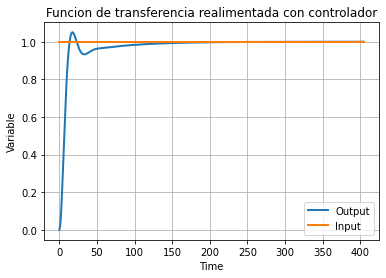

In [225]:
response_controlador = co.step_response(Gtc)
plt.plot(response_controlador.time, response_controlador.outputs, 
response_controlador.time, response_controlador.inputs, linewidth = 2)
plt.title('Funcion de transferencia realimentada con controlador')
plt.xlabel('Time')
plt.ylabel('Variable')
plt.legend(['Output', 'Input'])
plt.grid()
plt.show()